# Exploratory Data Analysis and Random Forest Modelling for Tour de France Capstone Project

## This workbook details:
### 1. Exploratory Data Analysis using visualisations
### 2. Implementation of a Random Forest model to predict the classification of riders
### 3. Evaluation of the Random Forest results 

# Import data and libraries

In [1]:
## importing libraries

# dataframe & numerical minipulation 
import pandas as pd
import numpy as np
from math import sqrt

# for plotting & EDA
import seaborn as sns
import matplotlib.pyplot as plt

# for modelling
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
import random
random.seed(24)

In [2]:
tdf_ranks = pd.read_csv('tdf_capstone_data.csv')

# EDA

In [3]:
## Setting axes and title sizes
sns.set(rc={"figure.figsize":(10, 10),
           'font.size': 20.0,
             'axes.labelsize': 20.0,
             'axes.titlesize': 20.0,
             'xtick.labelsize': 20.0,
             'ytick.labelsize': 20.0,
             'legend.fontsize': 20.0,
           'legend.title_fontsize': 20.0})
sns.plotting_context(font_scale=5)

{'font.size': 20.0,
 'axes.labelsize': 20.0,
 'axes.titlesize': 20.0,
 'xtick.labelsize': 20.0,
 'ytick.labelsize': 20.0,
 'legend.fontsize': 20.0,
 'axes.linewidth': 1.25,
 'grid.linewidth': 1.0,
 'lines.linewidth': 1.5,
 'lines.markersize': 6.0,
 'patch.linewidth': 1.0,
 'xtick.major.width': 1.25,
 'ytick.major.width': 1.25,
 'xtick.minor.width': 1.0,
 'ytick.minor.width': 1.0,
 'xtick.major.size': 6.0,
 'ytick.major.size': 6.0,
 'xtick.minor.size': 4.0,
 'ytick.minor.size': 4.0,
 'legend.title_fontsize': 20.0}

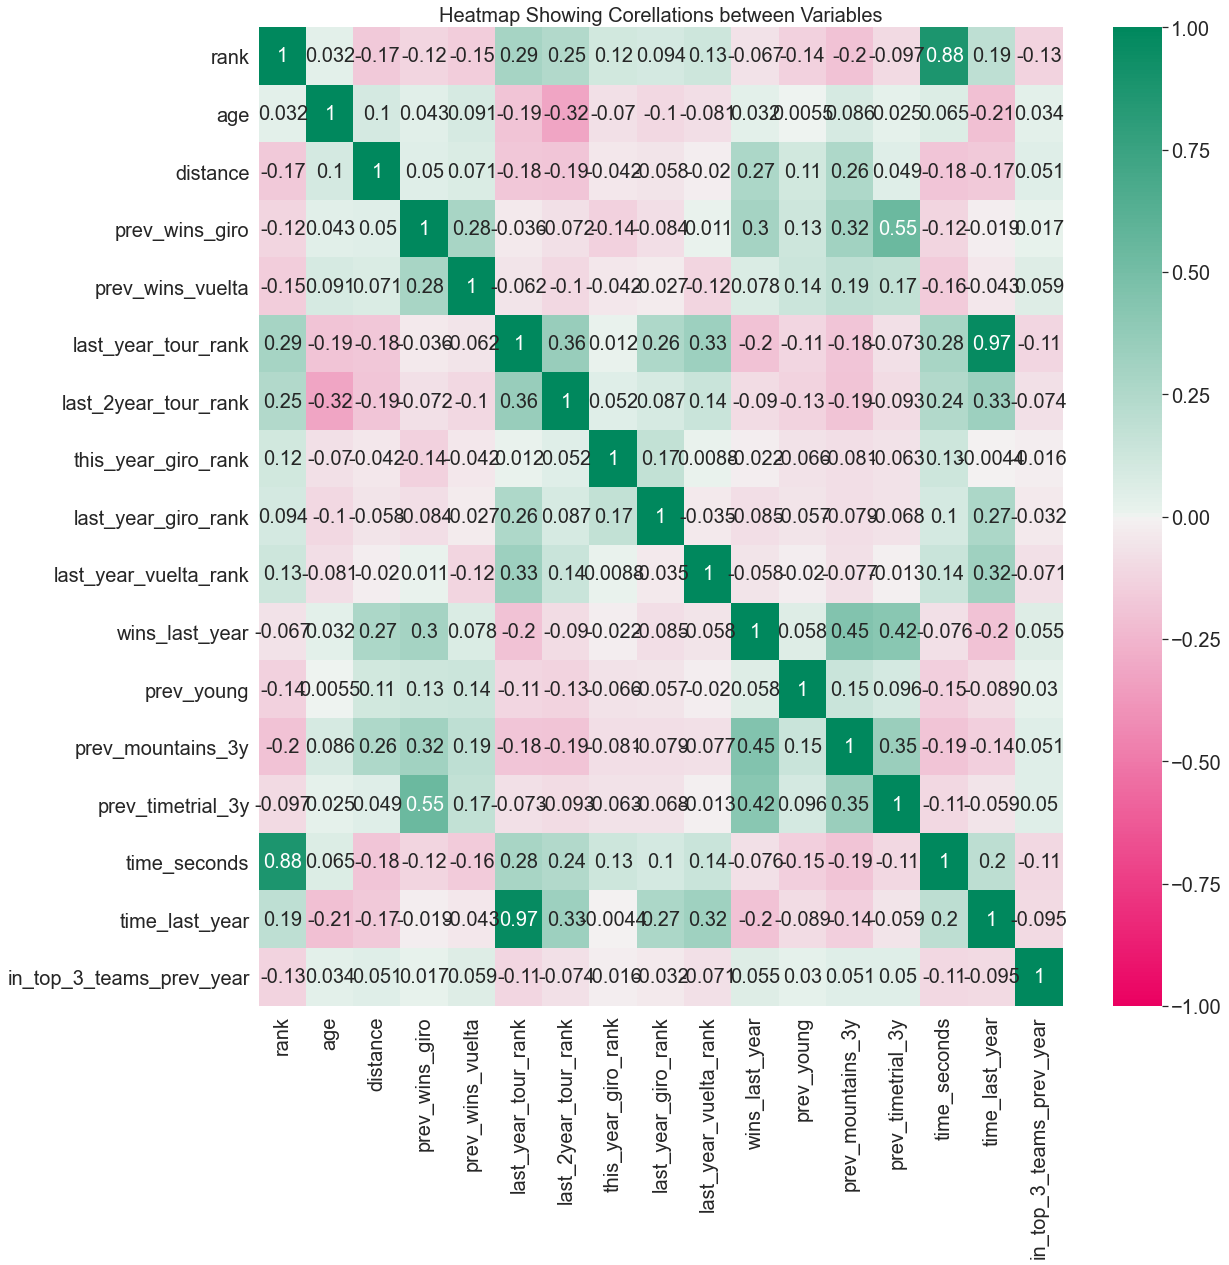

In [4]:
##Heat map of correlations between variables
sym_col = sns.diverging_palette(1, 150, s=100, as_cmap=True)

eda_cols = ['rank', 'age',
       'young', 'distance', 'prev_wins_giro',
       'prev_wins_vuelta', 'last_year_tour_rank', 'last_2year_tour_rank',
       'this_year_giro_rank', 'last_year_giro_rank', 'last_year_vuelta_rank',
       'wins_last_year', 'prev_young', 'prev_mountains_3y',
       'prev_timetrial_3y',  'time_seconds',
       'time_last_year', 'in_top_3_teams_prev_year']

plt.figure(figsize=(18,18))
plt.title("Heatmap Showing Corellations between Variables")
sns.heatmap(tdf_ranks[eda_cols].corr(),annot=True, vmin=-1,vmax=1, center = 0, cmap=sym_col)
plt.show()

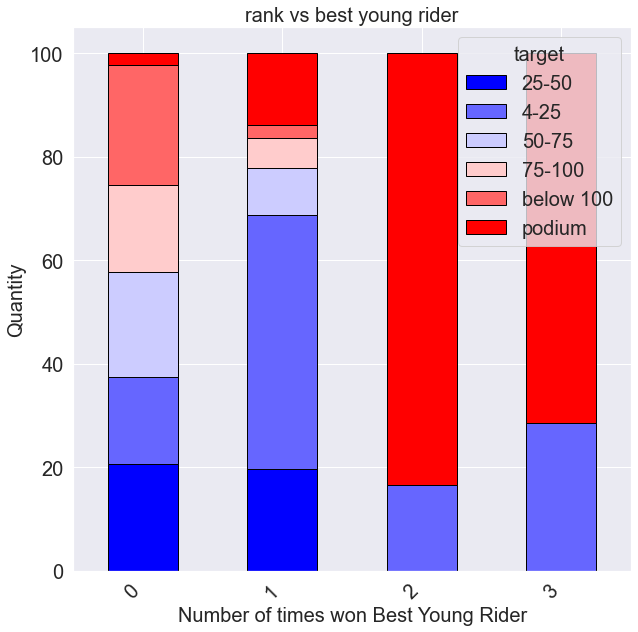

In [5]:
## stacked barchart for Distribution of target classes over number of times best young rider won

plotdata = pd.crosstab(tdf_ranks['prev_young'],tdf_ranks['target'])
stacked_plotdata = plotdata.apply(lambda x: x*100/sum(x), axis=1)
stacked_plotdata.plot(kind='bar', stacked=True, cmap="bwr", edgecolor = "black")
plt.title("rank vs best young rider")
plt.ylabel('Quantity')
plt.xlabel('Number of times won Best Young Rider')
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

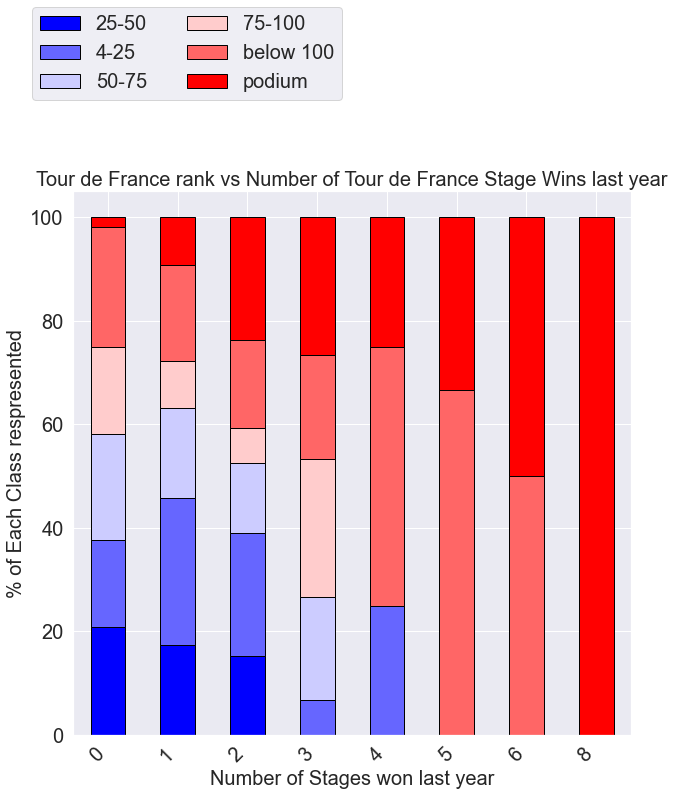

In [6]:
## stacked barchart for Distribution of target classes over number of stages won last year

plotdata = pd.crosstab(tdf_ranks['wins_last_year'],tdf_ranks['target'])
stacked_plotdata = plotdata.apply(lambda x: x*100/sum(x), axis=1)
stacked_plotdata.plot(kind='bar', stacked=True, cmap="bwr", edgecolor = "black")
plt.title("Tour de France rank vs Number of Tour de France Stage Wins last year")
plt.ylabel('% of Each Class respresented')
plt.xlabel('Number of Stages won last year')
plt.legend(loc="lower right", bbox_to_anchor=(0.5, 1.15), ncol=2)
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()
#plt.savefig('rankvwins.png')

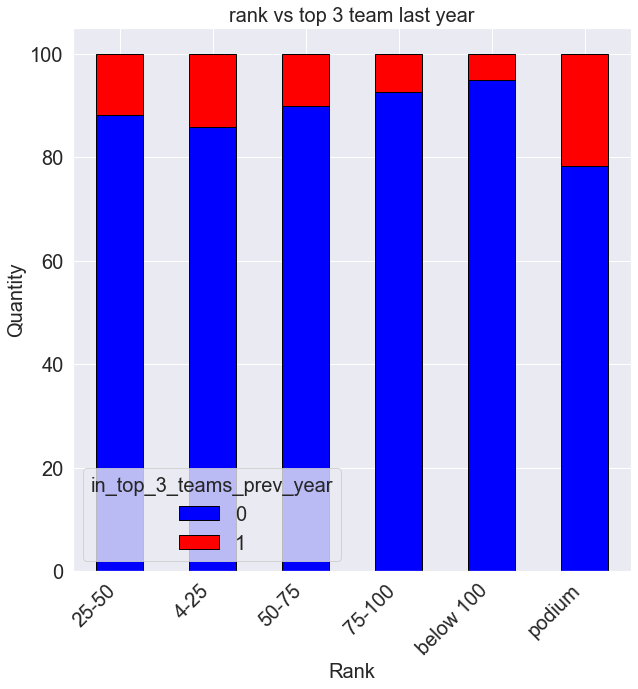

In [7]:
## stacked barchart for Distribution of whether a rider was in the top 3 teams of last year over target classes

plotdata = pd.crosstab(tdf_ranks['target'],tdf_ranks['in_top_3_teams_prev_year'])
stacked_plotdata = plotdata.apply(lambda x: x*100/sum(x), axis=1).sort_values(by='target')
stacked_plotdata.plot(kind='bar', stacked=True, cmap="bwr", edgecolor = "black")
plt.title("rank vs top 3 team last year")
plt.ylabel('Quantity')
plt.xlabel('Rank')
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

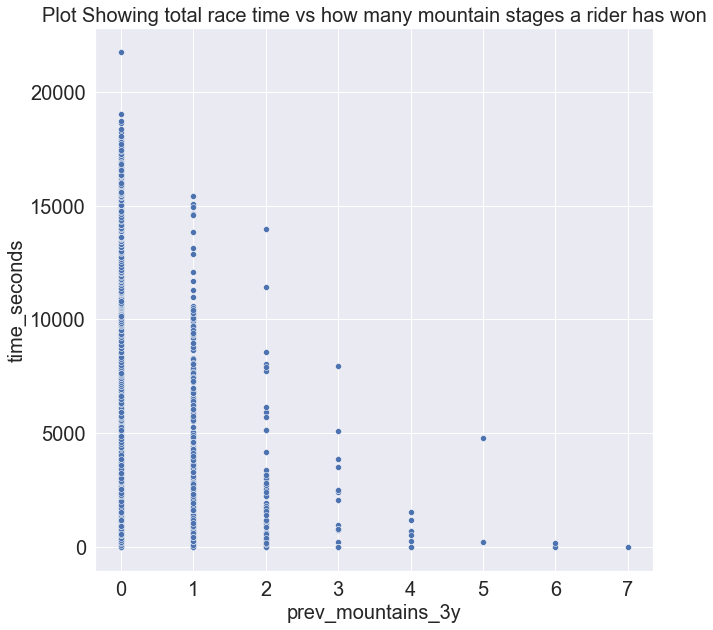

In [8]:
## Scatter plot of average win distance per target class

sns.scatterplot(data=tdf_ranks, x="prev_mountains_3y", y="time_seconds")
plt.title("Plot Showing total race time vs how many mountain stages a rider has won")
plt.show()

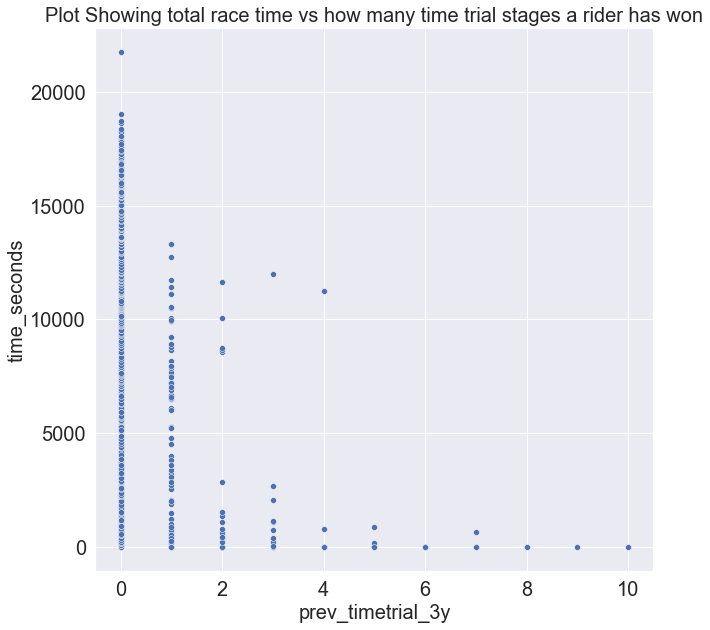

In [9]:
## Scatter plot of average win distance per target class

sns.scatterplot(data=tdf_ranks, x="prev_timetrial_3y", y="time_seconds")
plt.title("Plot Showing total race time vs how many time trial stages a rider has won")
plt.show()

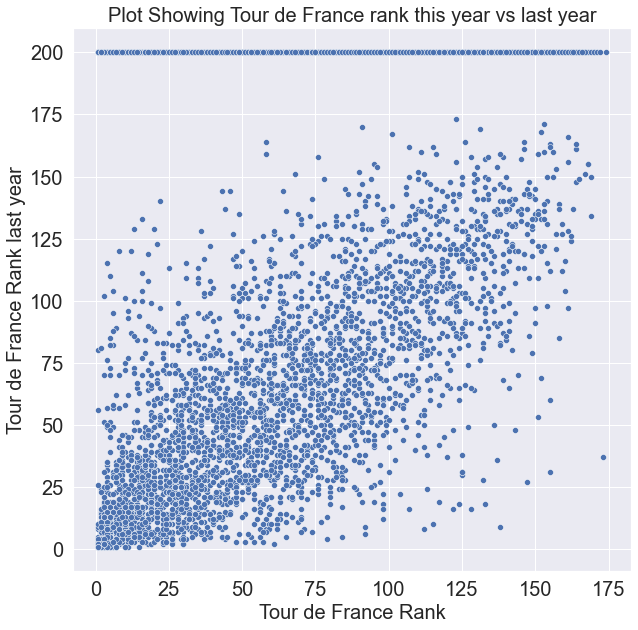

In [10]:
## Scatter plot of average win distance per target class
ax = sns.scatterplot(data=tdf_ranks, x="rank", y="last_year_tour_rank")
ax.set(xlabel='Tour de France Rank', ylabel='Tour de France Rank last year')
plt.title("Plot Showing Tour de France rank this year vs last year")
plt.show()

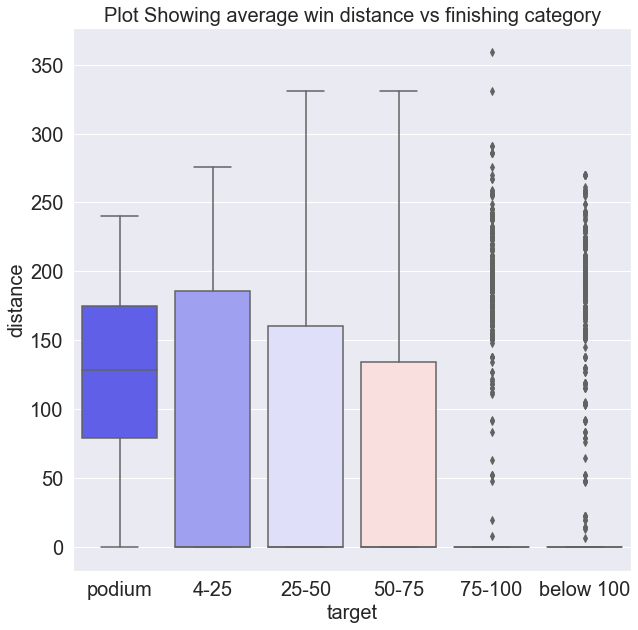

In [11]:
## Box plot of average win distance per target class

sns.boxplot(data=tdf_ranks,x="target", y="distance",palette='bwr')
plt.title("Plot Showing average win distance vs finishing category")
plt.show()

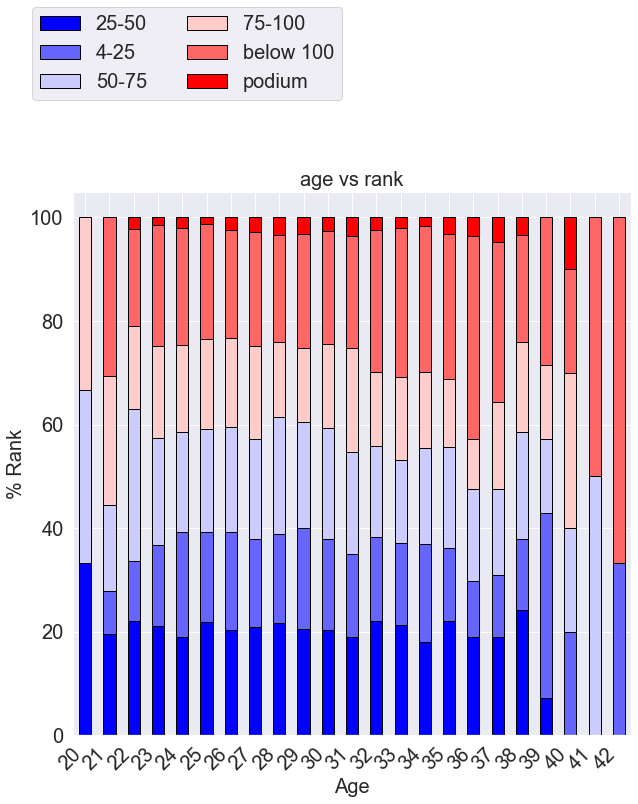

In [12]:
## stacked barchart for Distribution of whether a rider was in the top 3 teams of last year over target classes

plotdata = pd.crosstab(tdf_ranks['age'],tdf_ranks['target'])
stacked_plotdata = plotdata.apply(lambda x: x*100/sum(x), axis=1)
stacked_plotdata.plot(kind='bar', stacked=True, cmap="bwr", edgecolor = "black")
plt.legend(loc="lower right", bbox_to_anchor=(0.5, 1.15), ncol=2)
plt.title("age vs rank")
plt.ylabel('% Rank')
plt.xlabel('Age')
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

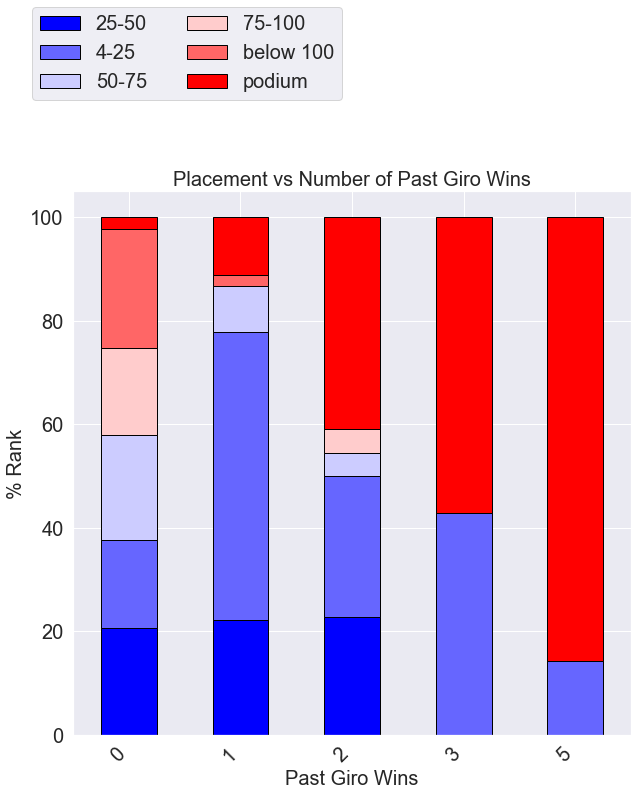

In [13]:
## stacked barchart for Distribution of whether a rider was in the top 3 teams of last year over target classes

plotdata = pd.crosstab(tdf_ranks['prev_wins_giro'],tdf_ranks['target'])
stacked_plotdata = plotdata.apply(lambda x: x*100/sum(x), axis=1)
stacked_plotdata.plot(kind='bar', stacked=True, cmap="bwr", edgecolor = "black")
plt.title("Placement vs Number of Past Giro Wins")
plt.ylabel('% Rank')
plt.xlabel('Past Giro Wins')
plt.legend(loc="lower right", bbox_to_anchor=(0.5, 1.15), ncol=2)
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

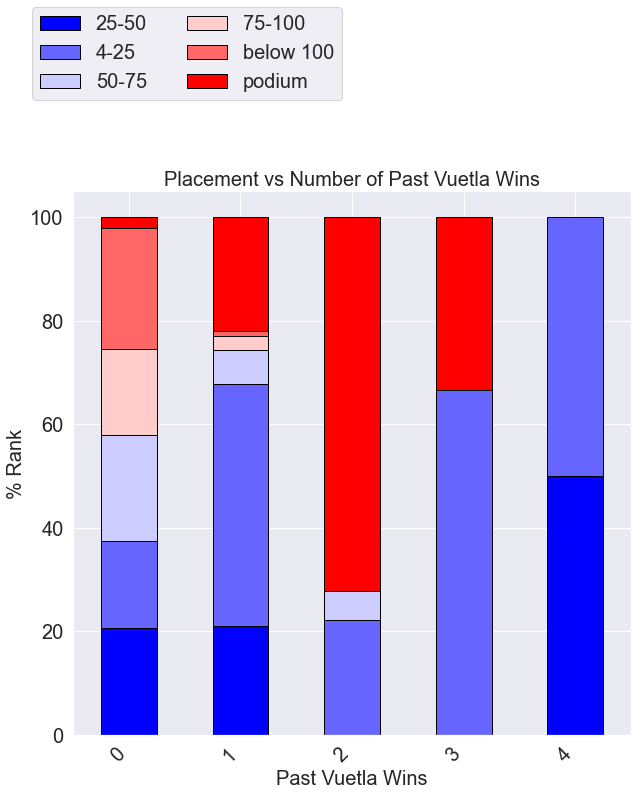

In [14]:
## stacked barchart for Distribution of whether a rider was in the top 3 teams of last year over target classes

plotdata = pd.crosstab(tdf_ranks['prev_wins_vuelta'],tdf_ranks['target'])
stacked_plotdata = plotdata.apply(lambda x: x*100/sum(x), axis=1)
stacked_plotdata.plot(kind='bar', stacked=True, cmap="bwr", edgecolor = "black")
plt.title("Placement vs Number of Past Vuetla Wins")
plt.ylabel('% Rank')
plt.xlabel('Past Vuetla Wins')
plt.legend(loc="lower right", bbox_to_anchor=(0.5, 1.15), ncol=2)
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

# Cutting Dataset

In [15]:
## Cutting the top year to ensure no 'N/A' for previous team
min_year = tdf_ranks['year'].min()
tdf_ranks = tdf_ranks[tdf_ranks['year']>min_year]

In [16]:
## Only including past Tour competitors 
tdf_ranks = tdf_ranks[tdf_ranks['time_last_year']<40000]

# Baseline for prediction: Last Year Result

In [17]:
## Creating a new column that is 1 if this year and last year's categories are identical, 0 otherwise
ident = []
for n in range(len(tdf_ranks)):
    if tdf_ranks.iloc[n,14] == tdf_ranks.iloc[n,29]:
        ident.append(1)
    else:
        ident.append(0)
ident2 = []
for n in range(len(tdf_ranks)):
    if tdf_ranks.iloc[n,15] == tdf_ranks.iloc[n,30]:
        ident2.append(1)
    else:
        ident2.append(0)

tdf_ranks['true_naive'] = ident
tdf_ranks['true_naive2'] = ident2

## Overall accuracy
accuracy_target = sum(ident)/len(ident)
accuracy_target2 = sum(ident2)/len(ident2)

## Printing results
print('Naïve accuracy for target:',accuracy_target,'Naïve accuracy for target 2:',accuracy_target2)

Naïve accuracy for target: 0.607516943930992 Naïve accuracy for target 2: 0.41096734442390637


In [18]:
## Calculating the mean accuracy overall, for each year and the standard deviation
means = []
prevars = []
for y in range (1961,2018):
    new = tdf_ranks[tdf_ranks['year']==y]
    lst = list(new['true_naive'])
    mean = sum(lst)/len(lst)
    prevar = ((mean*100)-(accuracy_target*100))**2
    prevars.append(prevar) 
    means.append(mean)
overall_mean = sum(means)/len(means)
standard_dev = sqrt(sum(prevars)/len(prevars))
print('Overall mean of years: '+str(overall_mean)+ ', Standard Deviation: '+str(standard_dev))

Overall mean of years: 0.590344180785554, Standard Deviation: 8.211163748900377


In [19]:
from sklearn.metrics import classification_report

In [20]:
print(classification_report(tdf_ranks.target_lastyr.values,tdf_ranks.target.values))

              precision    recall  f1-score   support

       25-50       0.35      0.33      0.34       739
        4-25       0.50      0.49      0.50       686
       50-75       0.29      0.30      0.29       623
      75-100       0.25      0.27      0.26       460
   below 100       0.63      0.62      0.62       626
      podium       0.52      0.50      0.51       112

    accuracy                           0.41      3246
   macro avg       0.42      0.42      0.42      3246
weighted avg       0.41      0.41      0.41      3246



In [21]:
## Calculating the mean accuracy overall, for each year and the standard deviation
means = []
prevars = []
for y in range (1961,2018):
    new = tdf_ranks[tdf_ranks['year']==y]
    lst = list(new['true_naive2'])
    mean = sum(lst)/len(lst)
    prevar = ((mean*100)-(accuracy_target2*100))**2
    prevars.append(prevar) 
    means.append(mean)
overall_mean = sum(means)/len(means)
standard_dev = sqrt(sum(prevars)/len(prevars))
print('Overall mean of years: '+str(overall_mean)+ ', Standard Deviation: '+str(standard_dev))

Overall mean of years: 0.4081282248058176, Standard Deviation: 9.94438223469809


Text(0.5, 0, 'Accuracy Score')

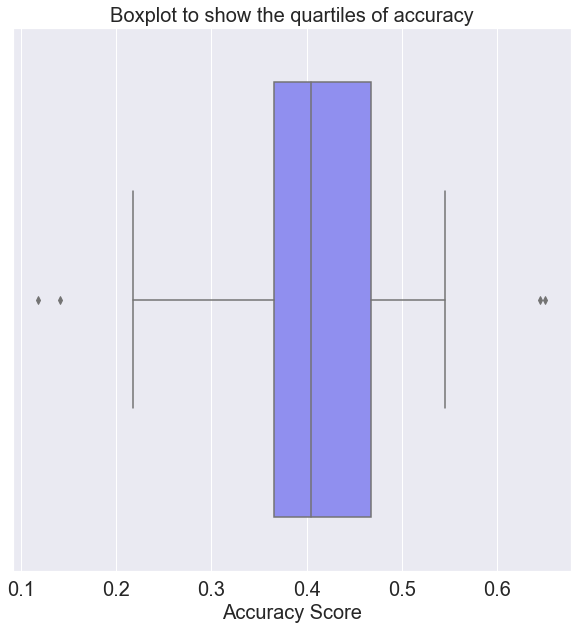

In [22]:
## Boxplot to show the quartiles of accuracy

sns.boxplot(x=means,palette='cool')
plt.title("Boxplot to show the quartiles of accuracy")
plt.xlabel('Accuracy Score')

In [23]:
print(classification_report(tdf_ranks.target_2lastyr.values,tdf_ranks.target2.values))

              precision    recall  f1-score   support

       26-50       0.33      0.31      0.32       709
        4-25       0.52      0.51      0.51       716
       51-75       0.29      0.30      0.29       623
    below 75       0.69      0.71      0.70      1086
      podium       0.52      0.50      0.51       112

    accuracy                           0.49      3246
   macro avg       0.47      0.46      0.47      3246
weighted avg       0.49      0.49      0.49      3246



Text(0.5, 0, 'Accuracy Score')

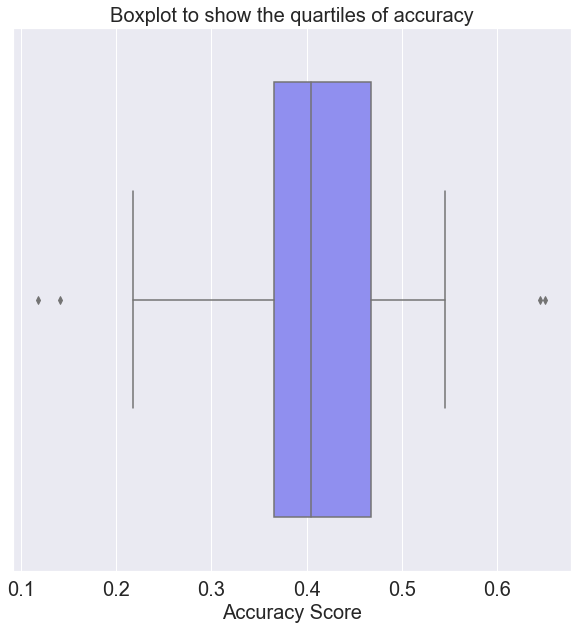

In [24]:
## Boxplot to show the quartiles of accuracy

sns.boxplot(x=means,palette='cool')
plt.title("Boxplot to show the quartiles of accuracy")
plt.xlabel('Accuracy Score')

# Prediction Dataframe

In [25]:
# 
feature_cols = ['age'
                ,'distance'
                ,'prev_wins_giro'
                ,'prev_wins_vuelta'
                ,'in_top_3_teams_prev_year'
                ,'wins_last_year'
                ,'prev_young'
                ,'time_last_year'
                ,'last_year_tour_rank'
                ,'prev_mountains_3y'
                ,'prev_timetrial_3y'
                ,'last_year_vuelta_rank'
                ,'last_year_giro_rank'
                ,'last_2year_tour_rank'
                ,'this_year_giro_rank'
               ]

X = tdf_ranks[feature_cols]
y = tdf_ranks['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y,random_state = 24)

In [26]:
X = tdf_ranks[feature_cols]
y = tdf_ranks['target']

In [27]:
# taking chunks of data each time 
tree = DecisionTreeClassifier(random_state=24)

scores = cross_val_score(tree, X_train, y_train, cv = 12)

print(scores)

[0.31797235 0.35483871 0.37327189 0.30875576 0.375      0.28703704
 0.32407407 0.28703704 0.30555556 0.38425926 0.35648148 0.30555556]


In [28]:
# average score 
sum(scores) / len(scores)

0.33165322580645157

In [29]:
rf = RandomForestClassifier(n_estimators=500, max_depth = 9, min_samples_leaf=8, random_state=124)
et = ExtraTreesClassifier(n_estimators=150,max_depth = 5)

In [30]:
## gives us a more relable score - splitting out the data and averaging it out 

rf_score = cross_val_score(rf, X_train, y_train, cv=5).mean()
et_score = cross_val_score(et, X_train, y_train, cv=5).mean()

In [31]:
print(f'Random scored {rf_score}')
print(f'Extra Random scored {et_score}')

Random scored 0.4225789239662072
Extra Random scored 0.42565732918334065


In [32]:
### Grid search to find best parameters
# {'max_depth': 9, 'min_samples_leaf': 8, 'n_estimators': 500}
'''rf_params = {
    'n_estimators': [100, 150, 200, 500],
    'max_depth': [6, 8, 9,10],
    'min_samples_leaf': [5, 6, 7, 8, 9, 10, 11]
}


gs = GridSearchCV(rf, param_grid=rf_params, cv=5)
gs.fit(X_train, y_train)

print(gs.best_score_)

gs.best_params_'''

"rf_params = {\n    'n_estimators': [100, 150, 200, 500],\n    'max_depth': [6, 8, 9,10],\n    'min_samples_leaf': [5, 6, 7, 8, 9, 10, 11]\n}\n\n\ngs = GridSearchCV(rf, param_grid=rf_params, cv=5)\ngs.fit(X_train, y_train)\n\nprint(gs.best_score_)\n\ngs.best_params_"

In [33]:
#gs.score(X_train, y_train)

In [34]:
## Predict on Train

rf.fit(X_train, y_train)

#
train_results = X_train.copy()
train_results['y_pred'] = rf.predict(X_train)
train_results['y_real'] = y_train
train_results['y_prob'] = rf.predict_proba(X_train)[:,1]

#train_results

In [35]:
accuracy_train = accuracy_score(train_results['y_real'], train_results['y_pred'])
print('Accuracy: %.3f' % accuracy_train)
precision = precision_score(train_results['y_real'], train_results['y_pred'], average='weighted')
print('Precision: %.3f' % precision)
recall = recall_score(train_results['y_real'], train_results['y_pred'], average='weighted')
print('Recall: %.3f' % recall)
f1 = f1_score(train_results['y_real'], train_results['y_pred'], average='weighted')
print('F1: %.3f' % f1)

Accuracy: 0.546
Precision: 0.557
Recall: 0.546
F1: 0.525


In [36]:
false = train_results[(train_results['y_pred']==train_results['y_real'])==False]

In [37]:
true = train_results[(train_results['y_pred']==train_results['y_real'])==True]

In [38]:
len(false)

1178

In [39]:
len(true)

1418

In [40]:
print(classification_report(train_results.y_pred.values,train_results.y_real.values))

              precision    recall  f1-score   support

       25-50       0.49      0.48      0.49       577
        4-25       0.72      0.57      0.63       677
       50-75       0.48      0.49      0.48       511
      75-100       0.19      0.65      0.29       118
   below 100       0.81      0.59      0.68       666
      podium       0.42      0.77      0.54        47

    accuracy                           0.55      2596
   macro avg       0.52      0.59      0.52      2596
weighted avg       0.61      0.55      0.57      2596



Text(0.5, 1.0, 'Plot to show Random Forest Feature Importance')

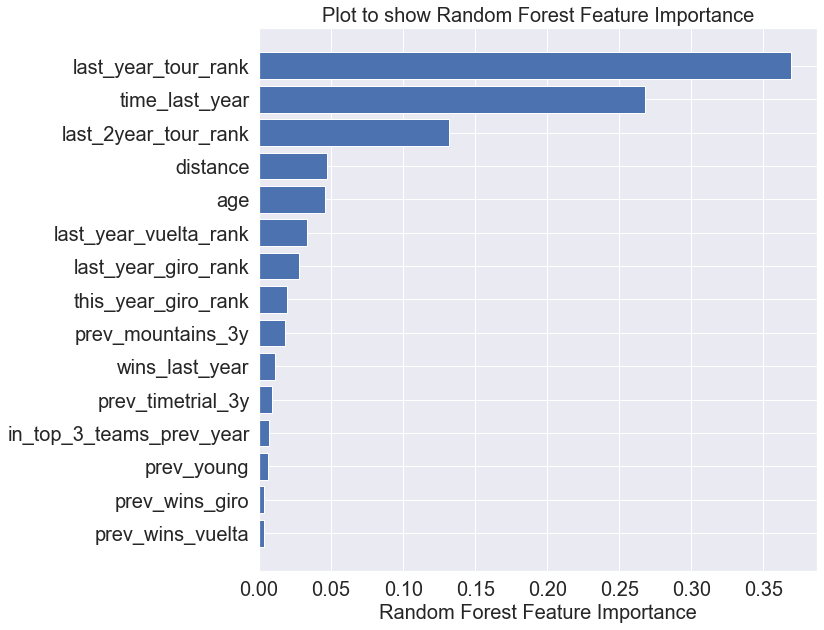

In [41]:
## Bar chart showing feature importances

sorted_idx = rf.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("Plot to show Random Forest Feature Importance")

#plt.barh(X_train.columns, rf.feature_importances_)

## Test

In [42]:
## Predict on Test

test_results = X_test.copy()
test_results['y_pred'] = rf.predict(X_test)
test_results['y_real'] = y_test
test_results['y_prob'] = rf.predict_proba(X_test)[:,1]

In [43]:
print(classification_report(test_results.y_pred.values,test_results.y_real.values))

              precision    recall  f1-score   support

       25-50       0.37      0.37      0.37       141
        4-25       0.67      0.51      0.58       178
       50-75       0.34      0.31      0.32       143
      75-100       0.15      0.45      0.22        33
   below 100       0.73      0.61      0.66       146
      podium       0.23      0.56      0.32         9

    accuracy                           0.46       650
   macro avg       0.41      0.47      0.41       650
weighted avg       0.51      0.46      0.48       650



In [44]:
## Accuracy, Precision, Recall, and F1

accuracy_test = accuracy_score(test_results['y_real'], test_results['y_pred'])
print('Accuracy: %.3f' % accuracy_test)
precision = precision_score(test_results['y_real'], test_results['y_pred'], average='weighted')
print('Precision: %.3f' % precision)
recall = recall_score(test_results['y_real'], test_results['y_pred'], average='weighted')
print('Recall: %.3f' % recall)
f1 = f1_score(test_results['y_real'], test_results['y_pred'], average='weighted')
print('F1: %.3f' % f1)

Accuracy: 0.455
Precision: 0.451
Recall: 0.455
F1: 0.435


In [45]:
true = test_results[(test_results['y_pred']==test_results['y_real'])==True]
len(true)

296

In [46]:
false = test_results[(test_results['y_pred']==test_results['y_real'])==False]
len(false)

354

## Accuracy of Test + Train by Year

In [47]:
combined = pd.concat([test_results, train_results])

In [48]:
combined['accuracy'] = combined['y_pred'] == combined['y_real']

In [49]:
combined = combined.join(tdf_ranks[['year']])

In [50]:
means = []
prevars = []
for y in range (1981,2018):
    new = combined[combined['year']==y]
    lst = list(new['accuracy'])
    mean = sum(lst)/len(lst)
    prevar = ((mean*100)-(((accuracy_train+accuracy_test)/2)*100))**2
    prevars.append(prevar) 
    means.append(mean)
    
overall_mean = sum(means)/len(means)
standard_dev = sqrt(sum(prevars)/len(prevars))
print('Overall mean: '+str(overall_mean)+ ', Standard Deviation: '+str(standard_dev))

Overall mean: 0.5094205064777474, Standard Deviation: 9.1328229922375


Text(0.5, 0, 'Accuracy Score')

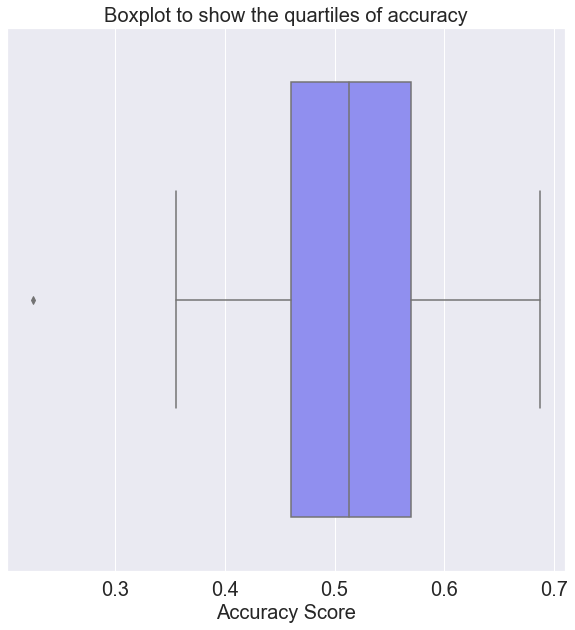

In [51]:
## IQR of mean accuracy per year for test + train 
sns.boxplot(x=means,palette='cool')
plt.title("Boxplot to show the quartiles of accuracy")
plt.xlabel('Accuracy Score')

## Accuracy of Just Test

In [52]:
recombined = test_results.join(tdf_ranks[['year']])

In [53]:
recombined['accuracy'] = recombined['y_pred'] == recombined['y_real']

In [54]:
recombined['accuracy'] = recombined['accuracy'].astype(int)

In [55]:
means = []
prevars = []
for y in range (1981,2018):
    new = recombined[recombined['year']==y]
    lst = list(new['accuracy'])
    mean = sum(lst)/len(lst)
    prevar = ((mean*100)-(accuracy_test*100))**2
    prevars.append(prevar) 
    means.append(mean)
overall_mean = sum(means)/len(means)
standard_dev = sqrt(sum(prevars)/len(prevars))
print('Overall mean: '+str(overall_mean)+ ', Standard Deviation: '+str(standard_dev))

Overall mean: 0.425132998585011, Standard Deviation: 14.881105045521311


Text(0.5, 0, 'Accuracy Score')

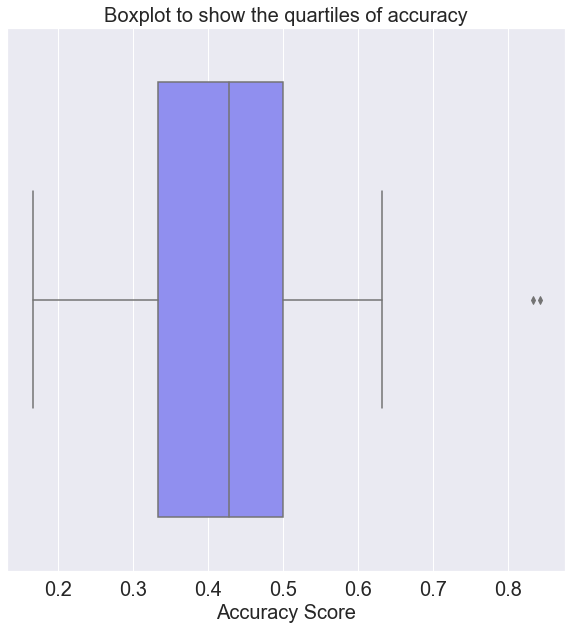

In [56]:
## IQR of mean accuracy per year for test 
sns.boxplot(x=means,palette='cool')
plt.title("Boxplot to show the quartiles of accuracy")
plt.xlabel('Accuracy Score')

# Modified Targets

## Smaller Classes

In [57]:
X = tdf_ranks[feature_cols]
y = tdf_ranks['target2']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state = 42)

In [58]:
# taking chunks of data each time 
tree = DecisionTreeClassifier(random_state=124)

scores = cross_val_score(tree, X_train, y_train, cv = 12)

In [59]:
print(scores)

[0.43684211 0.43684211 0.45789474 0.43684211 0.48677249 0.41269841
 0.37566138 0.47619048 0.38624339 0.44444444 0.5026455  0.30687831]


In [60]:
## gives us a more relable score - splitting out the data and averaging it out 

rf_score = cross_val_score(rf, X_train, y_train, cv=5).mean()
et_score = cross_val_score(et, X_train, y_train, cv=5).mean()

In [61]:
##

print(f'Random scored {rf_score}')
print(f'Extra Random scored {et_score}')

Random scored 0.5180481192815994
Extra Random scored 0.4964680253667038


In [62]:
## Predict on Train

rf.fit(X_train, y_train)

#
train_results = X_train.copy()
train_results['y_pred'] = rf.predict(X_train)
train_results['y_real'] = y_train
train_results['y_prob'] = rf.predict_proba(X_train)[:,1]

#train_results

## Check Accuracy, Precision, Recall & F1

In [63]:
accuracy = accuracy_score(train_results['y_real'], train_results['y_pred'])
print('Accuracy: %.3f' % accuracy)
precision = precision_score(train_results['y_real'], train_results['y_pred'], average='weighted')
print('Precision: %.3f' % precision)
recall = recall_score(train_results['y_real'], train_results['y_pred'], average='weighted')
print('Recall: %.3f' % recall)
f1 = f1_score(train_results['y_real'], train_results['y_pred'], average='weighted')
print('F1: %.3f' % f1)

Accuracy: 0.620
Precision: 0.620
Recall: 0.620
F1: 0.598


In [64]:
rf.feature_importances_

array([0.04244082, 0.0473928 , 0.00143566, 0.0035358 , 0.00623828,
       0.01080484, 0.00360626, 0.27365249, 0.36323112, 0.01979454,
       0.00712207, 0.03504612, 0.02792628, 0.13924225, 0.01853066])

<BarContainer object of 15 artists>

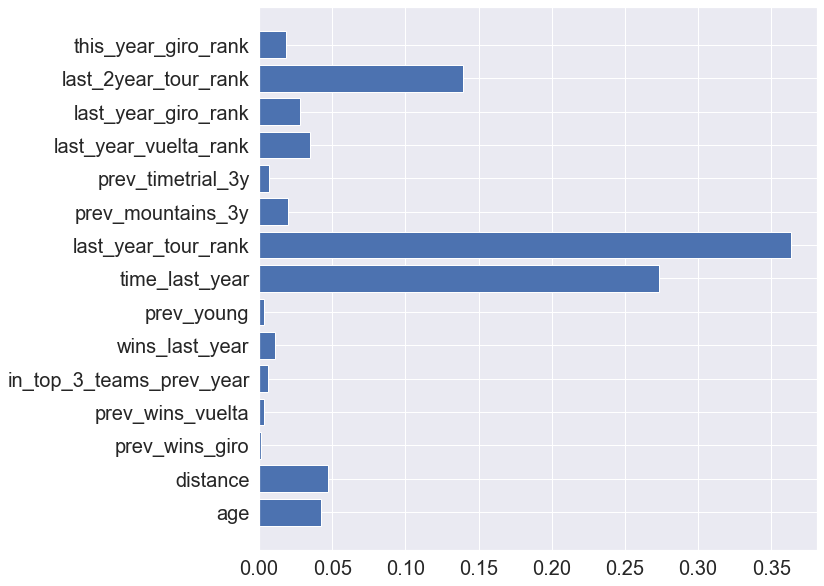

In [65]:
plt.barh(X_train.columns, rf.feature_importances_)

In [66]:
print(classification_report(train_results.y_pred.values,train_results.y_real.values))

              precision    recall  f1-score   support

       26-50       0.43      0.53      0.48       391
        4-25       0.74      0.57      0.64       630
       51-75       0.31      0.64      0.42       222
    below 75       0.86      0.68      0.76       998
      podium       0.33      0.81      0.47        31

    accuracy                           0.62      2272
   macro avg       0.54      0.64      0.55      2272
weighted avg       0.69      0.62      0.64      2272



In [67]:
## Predict on Test

test_results = X_test.copy()
test_results['y_pred'] = rf.predict(X_test)
test_results['y_real'] = y_test
test_results['y_prob'] = rf.predict_proba(X_test)[:,1]

#test_results
## Check Accuracy, Precision, Recall & F1

In [68]:
accuracy = accuracy_score(test_results['y_real'], test_results['y_pred'])
print('Accuracy: %.3f' % accuracy)
precision = precision_score(test_results['y_real'], test_results['y_pred'], average='weighted')
print('Precision: %.3f' % precision)
recall = recall_score(test_results['y_real'], test_results['y_pred'], average='weighted')
print('Recall: %.3f' % recall)
f1 = f1_score(test_results['y_real'], test_results['y_pred'], average='weighted')
print('F1: %.3f' % f1)

Accuracy: 0.517
Precision: 0.492
Recall: 0.517
F1: 0.486


In [69]:
print(classification_report(test_results.y_pred.values,test_results.y_real.values))

              precision    recall  f1-score   support

       26-50       0.26      0.32      0.29       164
        4-25       0.66      0.48      0.56       286
       51-75       0.17      0.38      0.23        88
    below 75       0.81      0.64      0.71       424
      podium       0.31      0.83      0.45        12

    accuracy                           0.52       974
   macro avg       0.44      0.53      0.45       974
weighted avg       0.61      0.52      0.55       974

